# Machine Learning

#### Importamos librerías relevantes

Primero importamos la notebook del EDA, para utilizar el dataframe que habíamos limpiado.

Hay un total de 6575 filas en el base de datos.
['direccion', 'm2', 'preciousd', 'preciopeso', 'usdm2', 'pesosm2', 'antig', 'galeria', 'dolar', 'trimestre_', 'barrios', 'comuna']
Barrios ordenados: ['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS ESTE', 'BELGRANO', 'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES', 'CONSTITUCION', 'FLORES NORTE', 'FLORES SUR', 'FLORESTA', 'LINIERS', 'MATADEROS', 'MONTE CASTRO', 'MONTSERRAT', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS', 'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA', 'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO NORTE', 'VILLA DEVOTO SUR', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI', 'VILLA URQUIZA']
Valores de galeria: ['SI' 'NO' nan 'S1']
Valores 

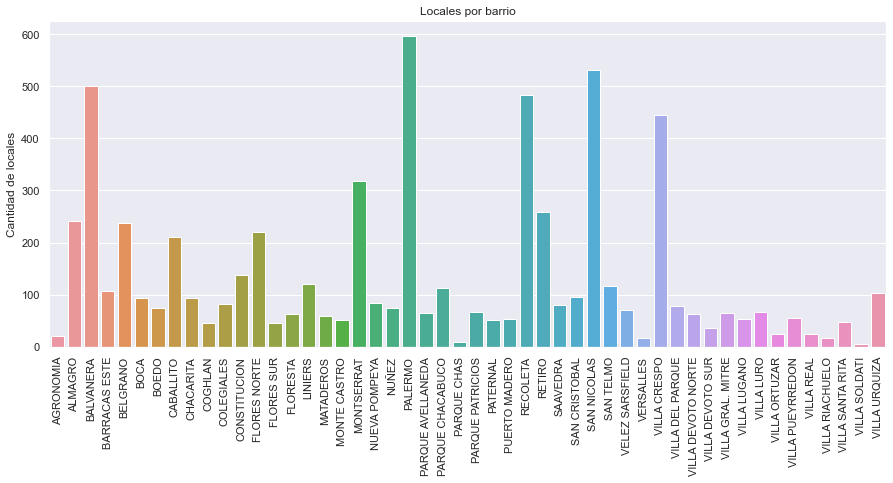

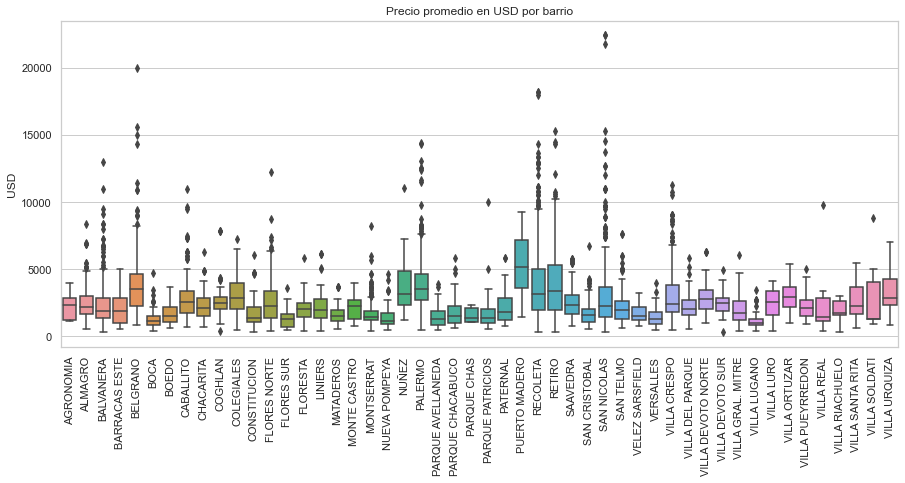

   comuna  preciousd
0       5      87000
1       5      92000
2       5     110000
3       5      60000
4       5     380000


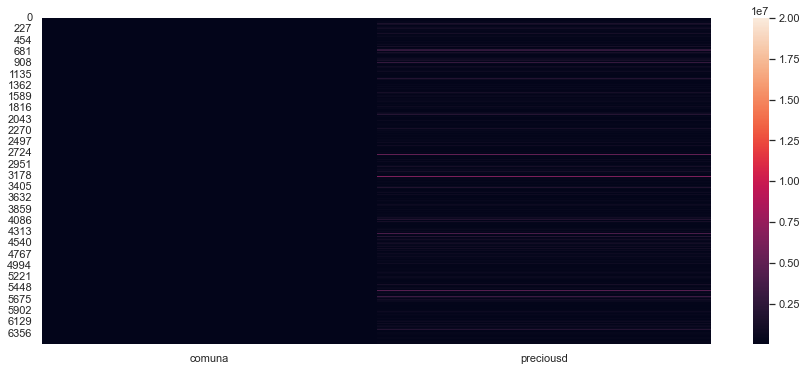

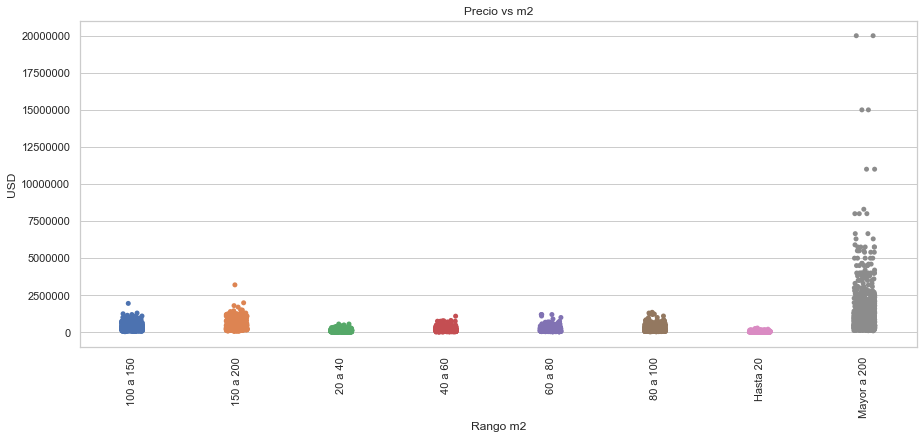

In [1]:
%run clusterai_Steven_Martins_eda.ipynb

Importamos librerías a utilizar:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error

En el EDA notamos que hay outliers que no representan una cantidad significativa de locales, en general hablando de montos superiores a los 3 millones de USD:

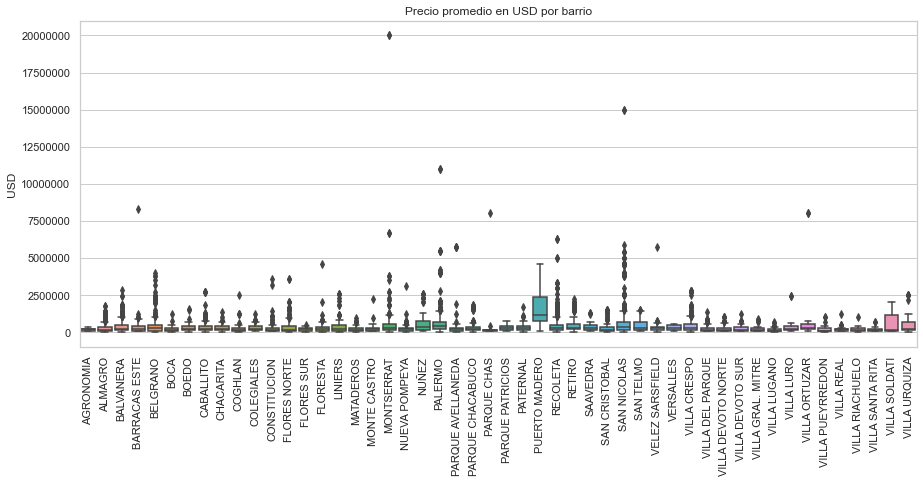

In [3]:
graf = df.sort_values("barrios")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=graf.barrios, y=graf.preciousd, data=graf)

plt.title("Precio promedio en USD por barrio")
plt.ylabel("USD")
plt.xlabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

Para solucionar esto, tomamos el percentil 99 del dataframe original y vemos gráficamente que llegamos a data mas representativa:

    m2  preciousd  usdm2  antig galeria  barrios  comuna     Rango_m2
0   26      87000   3346      5      SI  ALMAGRO       5      20 a 40
1   34      92000   2706     45      NO  ALMAGRO       5      20 a 40
2   60     110000   1833      0      NO  ALMAGRO       5      40 a 60
3   29      60000   2069     40      NO  ALMAGRO       5      20 a 40
4  334     380000   1138     65      NO  ALMAGRO       5  Mayor a 200


El percentil 99 limita los precios hasta el siguiente valor: 3500000.0


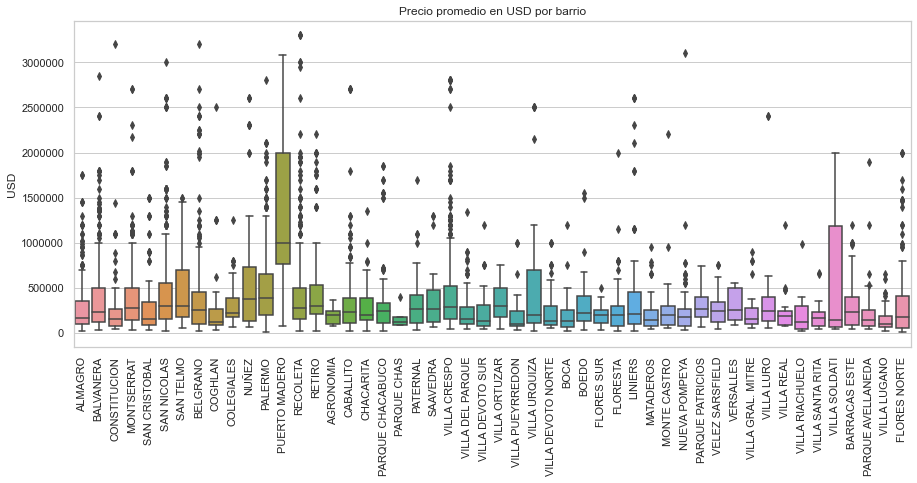

In [4]:
print(df.head())
print('\n')
print('El percentil 99 limita los precios hasta el siguiente valor: ' + str(df.preciousd.quantile(0.99)) )
df_ajustada = df[df.preciousd < df.preciousd.quantile(0.99)]

graf = df.sort_values("barrios")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_ajustada.barrios, y=df_ajustada.preciousd, data=graf)

plt.title("Precio promedio en USD por barrio")
plt.ylabel("USD")
plt.xlabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

#### Separamos el dataframe

In [5]:
y = np.array(df_ajustada.preciousd)
x = df_ajustada.drop(['preciousd', 'Rango_m2'], axis=1)
x.head()

,m2,usdm2,antig,galeria,barrios,comuna
0,26,3346,5,SI,ALMAGRO,5
1,34,2706,45,NO,ALMAGRO,5
2,60,1833,0,NO,ALMAGRO,5
3,29,2069,40,NO,ALMAGRO,5
4,334,1138,65,NO,ALMAGRO,5


In [6]:
x = pd.get_dummies(data=x)
x.shape

(6505, 56)

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

In [8]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(xtrain)

StandardScaler()

In [9]:
xtrain_sc = scaler.transform(X=xtrain)
xtest_sc = scaler.transform(X=xtest)

#### KNN Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

In [46]:
knn_reg = KNeighborsRegressor(weights="distance")
param_knn = [{'n_neighbors': np.arange(10, 41, 5)}]
regressor_knn = GridSearchCV(estimator=knn_reg, param_grid=param_knn, n_jobs=-1 ,refit = True, cv=5, verbose=2)

In [47]:
regressor_knn.fit(xtrain_sc, ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'), n_jobs=-1,
             param_grid=[{'n_neighbors': array([10, 15, 20, 25, 30, 35, 40])}],
             verbose=2)

In [48]:
regressor_knn.best_params_

{'n_neighbors': 10}

In [49]:
regressor_knn.cv_results_

{'mean_fit_time': array([0.00560184, 0.00580173, 0.01260657, 0.00680056, 0.01520181,
        0.01818595, 0.01459165]),
 'std_fit_time': array([0.000488  , 0.00039711, 0.00990995, 0.0007499 , 0.00990678,
        0.00813421, 0.00207446]),
 'mean_score_time': array([0.40859818, 0.42039809, 0.40299397, 0.371209  , 0.40720253,
        0.38219285, 0.24199228]),
 'std_score_time': array([0.01562787, 0.02012396, 0.01492518, 0.04260409, 0.00980703,
        0.02082542, 0.09331374]),
 'param_n_neighbors': masked_array(data=[10, 15, 20, 25, 30, 35, 40],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30},
  {'n_neighbors': 35},
  {'n_neighbors': 40}],
 'split0_test_score': array([0.78063967, 0.7661791 , 0.74987049, 0.73260787, 0.71663192,
        0.70461206, 0.69386073]),
 'split1_test_score': array([0.7389

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [40]:
ypred = regressor_knn.predict(xtest_sc)
np.sqrt(mean_squared_error(ytest, ypred))

166721.65952031172